In [1]:
# Studying the effects of bunch length on distortion
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.constants import c;
import sys;

sys.path.insert(0, "../");
import eos_sim as es;
plt.style.use('notes')
# Bunch Parameters:
Q_drive    = 1.5e-9;
sigz_drive = 5.2e-6;
sigt_drive = sigz_drive/c;
Q_wit      = 0.5e-9;
sigz_wit   = 36e-6;
sigt_wit   = sigz_wit/c;
del_z      = 75e-6;
del_t      = del_z/c;
x_drive    = 1.0e-3;
y_drive    = 0.0;
x_wit      = 1.0e-3;
y_wit      = 0.0;
r_drive    = np.sqrt(x_drive**2 + y_drive**2);
r_wit      = np.sqrt(x_wit**2 + y_wit**2);

drive      = {'Q':Q_drive, 'sig_t':sigt_drive, 'r':r_drive};
wit        = {'Q':Q_wit, 'sig_t':sigt_wit, 'r':r_wit};

# Crystal parameters
d          = 25e-6; #m, crystal thickness
ctype      = 'GaP';

# Probe parameters:
y_cen    = 800e-9;
del_y = 27e-9;
T     = 387e-15;

ModuleNotFoundError: No module named 'eos_sim'

In [3]:
t      = np.linspace(-T/2, T/2, 1000);
# array of lengths to test
sigz   = np.array([5, 7.5, 10, 12.5])*1e-6;
gammas = {};

for i in range(len(sigz)):
    key  = str(sigz[i]*1e6);
    sigt = sigz[i] / c;
    drive['sig_t'] = sigt;
    gamma, E_eff, tt = es.phase_retard(ctype, d, drive, y_cen, del_y, T, 'geo');
    gammas[key] = gamma;


../eos_sim.py:236: RuntimeWarning: divide by zero encountered in true_divide
  lam = (c / (f)) * 1e9; # nm
../eos_sim.py:183: RuntimeWarning: invalid value encountered in true_divide
  n = np.sqrt(2.68 + 6.40 * lam**2 / (lam**2 - 0.0903279));
../eos_sim.py:183: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(2.68 + 6.40 * lam**2 / (lam**2 - 0.0903279));


T = 386.811035156
773.0 827.0
773.0 827.0
T = 386.811035156
773.0 827.0
773.0 827.0
T = 386.811035156
773.0 827.0
773.0 827.0
T = 386.811035156
773.0 827.0
773.0 827.0


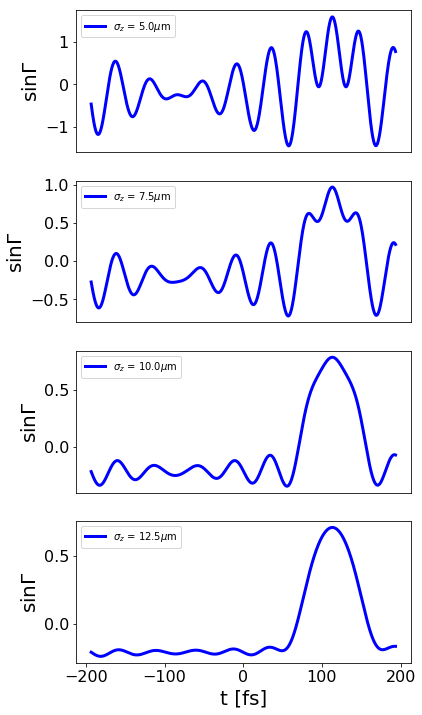

In [4]:
fig = plt.figure(figsize = (6, 12));
for i in range(len(sigz)):
    key = str(sigz[i]*1e6);
    ax  = fig.add_subplot(len(sigz), 1, i + 1)
    if i == len(sigz) - 1:
        ax.set_xlabel('t [fs]')
    else:
        ax.set_xticks([]);
    ax.set_ylabel(r'sin$\Gamma$')
    ax.plot(tt, gammas[key], '-b', \
            label = r'$\sigma_z$ = ' + str(key) + r'$\mu$m');
    ax.legend();
plt.show();